# Airbnb Market Analysis

## Project Objective
A city manager for Airbnb in Dublin and wants to better understand:
- what guests are searching for in Dublin,
- which inquiries hosts tend to accept.

Based on the findings the city manager will try to boost the number and quality of hosts in Dublin to fit the demands from guests. The goal of this project is to analyze, understand, visualize, and communicate the demand / supply in the market. For example, it may be useful to look at the breakdown of start date day of the week, or number of nights, or room type that is searched for, and how many hosts accepted the reservation. In particular, we are interested in:
- what the gaps are between guest demand and host supply that the new city manager could plug to increase the number of bookings in Dublin,
- what other data would be useful to have to deepen the analysis and understanding.


## Table of Content
- [Data Import](#Data-Import)
- [Data Profiling](#Data-Profiling)
    - [_searches_ Dataset](#searches-Dataset)
    - [_contacts_ Dataset](#contacts-Dataset)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
    - [_searches_ Dataset Analysis](#searches-Dataset-Analysis)
    - [_contacts_ Dataset Analysis](#contacts-Dataset-Analysis)
    - [Merged Datasets Analysis](#Merged-Datasets-Analysis)

## Data Import

In [1]:
# Import libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
os.getcwd()

'C:\\Users\\najmi\\Downloads\\Data Analytics with Python Training\\Market Analysis\\datasets (3)\\datasets'

In [3]:
os.listdir()

['.ipynb_checkpoints',
 'Airbnb Market Analysis.ipynb',
 'contacts.tsv',
 'searches.tsv']

In [4]:
# Import the datasets
def import_data(file_path):
    # Read the first few lines of the file to determine the separator
    with open(file_path, 'r') as file:
        first_line = file.readline()
    
    # Check for common separators
    if '\t' in first_line:
        sep = '\t'
    elif ',' in first_line:
        sep = ','
    elif ';' in first_line:
        sep = ';'
    else:
        raise ValueError("Unknown separator in file")
    # Use determined separator to read the entire file
    data = pd.read_csv(file_path, sep=sep)
    return data
        
# Import dataset
searches = import_data('searches.tsv')

contacts = import_data('contacts.tsv')

## Data Profiling

### _searches_ Dataset

In [5]:
def profile_data(df):
    print('First 5 rows of dataset:')
    display(df.head())
    print('Last 5 rows of dataset:')
    display(df.tail())
    print('Percentage of NaN values in dataset:\n', df.isna().sum()/len(df), '\n')
    print('Number of duplicated rows:', df.duplicated().sum())

profile_data(searches)

First 5 rows of dataset:


,ds,id_user,ds_checkin,ds_checkout,n_searches,n_nights,n_guests_min,n_guests_max,origin_country,filter_price_min,filter_price_max,filter_room_types,filter_neighborhoods
0,2014-10-01,0000af0a-6f26-4233-9832-27efbfb36148,2014-10-09,2014-10-12,16,3.0,2,2,IE,0.0,67.0,",Entire home/apt,Entire home/apt,Private room,...",NaN
1,2014-10-01,0000af0a-6f26-4233-9832-27efbfb36148,2014-10-09,2014-10-19,3,10.0,1,2,IE,0.0,67.0,NaN,NaN
2,2014-10-01,000cd9d3-e05b-4016-9e09-34a6f8ba2fc5,NaN,NaN,1,NaN,1,1,GB,NaN,NaN,NaN,NaN
3,2014-10-01,000cd9d3-e05b-4016-9e09-34a6f8ba2fc5,2014-11-08,2014-11-10,11,2.0,1,2,GB,NaN,NaN,",Entire home/apt",NaN
4,2014-10-01,001c04f0-5a94-4ee0-bf5d-3591265256de,NaN,NaN,1,NaN,1,1,IE,NaN,NaN,NaN,NaN


Last 5 rows of dataset:


,ds,id_user,ds_checkin,ds_checkout,n_searches,n_nights,n_guests_min,n_guests_max,origin_country,filter_price_min,filter_price_max,filter_room_types,filter_neighborhoods
35732,2014-10-14,ff3c92ed-ebea-4691-a808-cc6fb73f2f55,NaN,NaN,3,NaN,2,2,US,0.0,1.000000e+02,Entire home/apt,NaN
35733,2014-10-14,ff61875b-1d27-4ee4-bd4e-36671d3bfed4,NaN,NaN,2,NaN,1,1,US,NaN,NaN,NaN,NaN
35734,2014-10-14,ff946a14-777b-4597-91b2-3277921214cd,2014-11-03,2014-11-06,10,3.0,1,3,IL,NaN,NaN,Entire home/apt,NaN
35735,2014-10-14,ffc681d4-3668-4448-af38-6f73bc9fb89d,NaN,NaN,5,NaN,1,1,IE,0.0,4.850000e+02,NaN,NaN
35736,2014-10-14,ffe0f0c3-f8e3-418e-82e5-3a29fdd183bd,NaN,NaN,3,NaN,1,1,US,480.0,1.073742e+09,",Entire home/apt",NaN


Percentage of NaN values in dataset:
 ds                      0.000000
id_user                 0.000000
ds_checkin              0.331561
ds_checkout             0.331561
n_searches              0.000000
n_nights                0.331561
n_guests_min            0.000000
n_guests_max            0.000000
origin_country          0.000000
filter_price_min        0.627221
filter_price_max        0.627221
filter_room_types       0.546940
filter_neighborhoods    0.962336
dtype: float64 

Number of duplicated rows: 0


The neighbourhood column in searches has 96.23% of null values. This could lead to innacurate assumptions about the demand from people. When looking through the column, 'City Centre' was a common choice, so this should be investigated further with more data.

### _contacts_ Dataset

In [6]:
profile_data(contacts)

First 5 rows of dataset:


,id_guest,id_host,id_listing,ts_contact_at,ts_reply_at,ts_accepted_at,ts_booking_at,ds_checkin,ds_checkout,n_guests,n_messages
0,000dfad9-459b-4f0b-8310-3d6ab34e4f57,13bb24b8-d432-43a2-9755-5ea11b43bb69,21d2b1a2-fdc3-4b4c-a1f0-0eaf0cc02370,2014-10-04 16:26:28.0,2014-10-04 16:26:28.0,2014-10-04 16:26:28.0,2014-10-04 16:26:28.0,2014-10-13,2014-10-15,2,13
1,00197051-c6cb-4c3a-99e9-86615b819874,46aa3897-9c00-4d76-ac66-a307593d0675,fb5ed09a-9848-4f2c-b2ef-34deb62164fb,2014-11-04 09:10:03.0,2014-11-04 09:45:50.0,2014-11-04 09:45:50.0,2014-11-04 12:20:46.0,2014-11-27,2014-11-30,1,10
2,0027538e-aa9e-4a02-8979-b8397e5d4cba,6bbb88ca-db66-48c5-9c4b-862f7706284a,d3871da6-8012-4dc4-b508-c91f2c10c297,2014-10-10 12:02:50.0,2014-10-10 15:07:01.0,NaN,NaN,2014-10-17,2014-10-19,2,3
3,0027538e-aa9e-4a02-8979-b8397e5d4cba,8772bc85-a9b7-4d85-a52d-41f3620c2912,0d9b5583-8053-4b67-adfe-8c29eb12efed,2014-10-10 15:23:53.0,NaN,NaN,NaN,2014-10-17,2014-10-19,2,2
4,0027538e-aa9e-4a02-8979-b8397e5d4cba,ac162061-55e2-4072-ac91-2e080f9581f2,ec68e0af-b0f2-42c7-b6f8-d41061c083ff,2014-10-10 15:22:26.0,2014-10-10 15:24:26.0,2014-10-10 15:24:26.0,2014-10-10 15:52:42.0,2014-10-17,2014-10-19,2,14


Last 5 rows of dataset:


,id_guest,id_host,id_listing,ts_contact_at,ts_reply_at,ts_accepted_at,ts_booking_at,ds_checkin,ds_checkout,n_guests,n_messages
7818,ffe366f0-6ab6-4e94-818a-c69c125fed3c,8be6bf94-aeb3-4a51-8ac4-db60baedfea1,7732bad8-e800-49f3-8751-e7604e3fb5a3,2014-10-07 21:43:00.0,2014-10-08 08:19:33.0,2014-10-08 08:19:33.0,NaN,2014-10-17,2014-10-20,2,5
7819,ffe366f0-6ab6-4e94-818a-c69c125fed3c,b92639c1-a5a8-48f6-8484-4fe6f62d1c6d,cc3a6bd4-d64f-4cbe-b947-c36c3851b487,2014-10-13 15:38:28.0,2014-10-13 15:44:56.0,NaN,NaN,2014-10-17,2014-10-20,2,5
7820,ffe366f0-6ab6-4e94-818a-c69c125fed3c,d0b6d89a-4379-43f2-9560-4943df5b8f4f,6e5b4380-66d2-4f2a-8f89-d2794598997d,2014-10-13 15:40:49.0,2014-10-13 15:42:46.0,NaN,NaN,2014-10-17,2014-10-20,2,3
7821,ffe366f0-6ab6-4e94-818a-c69c125fed3c,f86bc9ab-e199-4254-8609-fd67d6aaed42,28caf371-6d1d-4e06-aaf1-e660966ac7a1,2014-10-07 21:30:31.0,2014-10-08 19:04:43.0,NaN,NaN,2014-10-17,2014-10-20,2,2
7822,fffea166-9432-43a7-8b1b-09d6f30c1c07,6d656267-642e-4972-bdec-a35d82b84ebb,90dddef6-23ef-4df3-b454-8fd3d0e8cade,2014-10-08 00:05:05.0,2014-10-12 20:58:12.0,NaN,NaN,2014-11-11,2014-11-18,2,2


Percentage of NaN values in dataset:
 id_guest          0.000000
id_host           0.000000
id_listing        0.000000
ts_contact_at     0.000000
ts_reply_at       0.077208
ts_accepted_at    0.536367
ts_booking_at     0.722101
ds_checkin        0.000000
ds_checkout       0.000000
n_guests          0.000000
n_messages        0.000000
dtype: float64 

Number of duplicated rows: 0


## Exploratory Data Analysis

### _searches_ Dataset Analysis

In [7]:
# Drop filter_neighborhoods column
searches = searches.drop(columns=['filter_neighborhoods'])

In [8]:
print('Shape of dataset:', searches.shape)

Shape of dataset: (35737, 12)


In [9]:
searches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35737 entries, 0 to 35736
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ds                 35737 non-null  object 
 1   id_user            35737 non-null  object 
 2   ds_checkin         23888 non-null  object 
 3   ds_checkout        23888 non-null  object 
 4   n_searches         35737 non-null  int64  
 5   n_nights           23888 non-null  float64
 6   n_guests_min       35737 non-null  int64  
 7   n_guests_max       35737 non-null  int64  
 8   origin_country     35737 non-null  object 
 9   filter_price_min   13322 non-null  float64
 10  filter_price_max   13322 non-null  float64
 11  filter_room_types  16191 non-null  object 
dtypes: float64(3), int64(3), object(6)
memory usage: 3.3+ MB


In [10]:
# Manipulation of searches dataset

# Convert date column to datetime data type for easier analysis
searches['ds'] = pd.to_datetime(searches['ds'])
searches['ds_checkin'] = pd.to_datetime(searches['ds_checkin'])
searches['ds_checkout'] = pd.to_datetime(searches['ds_checkout'])

# How soon they want the room
searches['length_preparation'] = searches['ds_checkin'] - searches['ds']

In [11]:
# Describe searches dataset

# Helps understand the dataset and its distribution of values within columns better
display(searches.describe())

,n_searches,n_nights,n_guests_min,n_guests_max,filter_price_min,filter_price_max,length_preparation
count,35737.000000,23888.000000,35737.000000,35737.000000,13322.000000,1.332200e+04,23888
mean,9.206565,7.672765,1.742955,2.105857,8.470200,9.019063e+07,51 days 08:11:53.730743469
std,17.348746,21.557614,1.460440,1.817358,53.987679,2.978482e+08,65 days 18:56:19.491940518
min,1.000000,0.000000,1.000000,1.000000,0.000000,9.000000e+00,-1 days +00:00:00
25%,1.000000,2.000000,1.000000,1.000000,0.000000,8.600000e+01,10 days 00:00:00
50%,4.000000,3.000000,1.000000,2.000000,0.000000,1.390000e+02,26 days 00:00:00
75%,10.000000,5.000000,2.000000,2.000000,0.000000,3.010000e+02,67 days 00:00:00
max,448.000000,399.000000,16.000000,16.000000,1250.000000,1.073742e+09,604 days 00:00:00


This shows the number of guests is usually 1 or 2. This can be understood since even at 75% the `n_guests_min` and `n_guests_max` are 2 and 25% is 1. Leads to believe that smaller accommodations are preferred.

In [12]:
# Calculate skewness in searches dataset

display(searches.skew(axis=0, numeric_only=True, skipna=True))

n_searches           7.509258
n_nights             9.942364
n_guests_min         3.583798
n_guests_max         3.148548
filter_price_min    11.087745
filter_price_max     2.999833
dtype: float64

All numeric columns have a coefficient value greater than 1. This results in a positive skewness. This suggests the present of outliers in these numerical columns which could heavily impact the descriptive statistics.

### Distributions

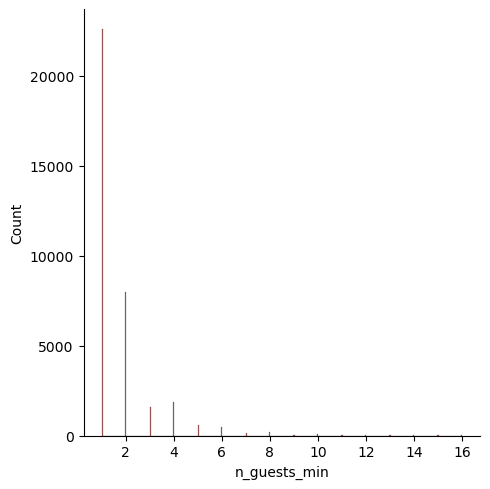

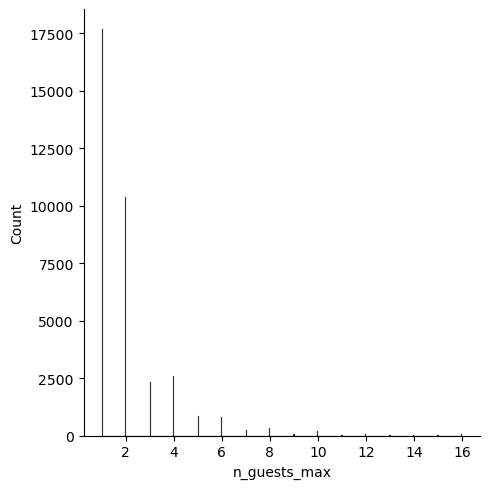

In [13]:
# Distribution plot of n_guests_min and n_guests_max
sns.displot(searches, x='n_guests_min', color='brown')
sns.displot(searches, x='n_guests_max', color='black')
plt.show()

Both have similar distributions with 1 being the most popular option and 2 being the next popular option.

(array([16344., 16346., 16348., 16350., 16352., 16354., 16356.]),
 [Text(16344.0, 0, '2014-10-01'),
  Text(16346.0, 0, '2014-10-03'),
  Text(16348.0, 0, '2014-10-05'),
  Text(16350.0, 0, '2014-10-07'),
  Text(16352.0, 0, '2014-10-09'),
  Text(16354.0, 0, '2014-10-11'),
  Text(16356.0, 0, '2014-10-13')])

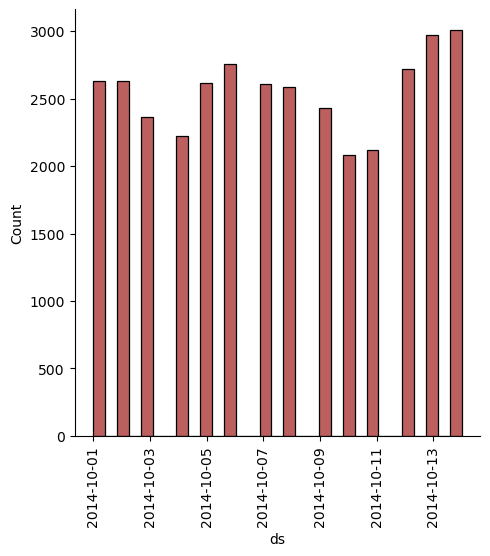

In [14]:
# When were searches conducted

ax = sns.displot(searches, x='ds', color='brown')
plt.xticks(rotation=90)

Noticed all date searches were between 1st of October 2014 to 14th of October 2014. No major variation in when search was conducted between these dates.

In [15]:
# Percentage of dataset with a filter_price_max above 600

print('Percentage of dataset with max price above 600:', len(searches[searches['filter_price_max'] > 600]) / len(searches['filter_price_max'])*100, '%')

Percentage of dataset with max price above 600: 5.311022189887232 %


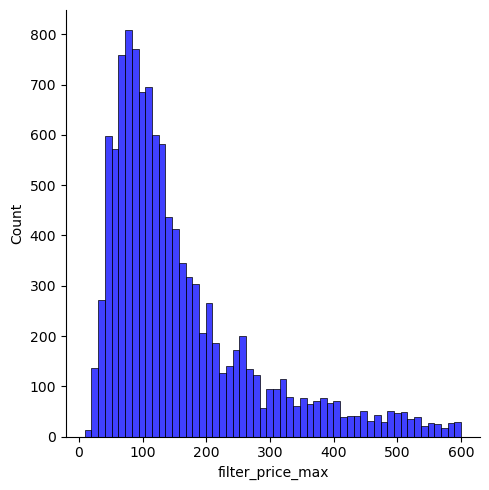

In [16]:
# Distribution of filter_price_max of searches

# Removing the set upper limit
searches_maxprice_removed = searches[searches['filter_price_max'] <= 600]

# Distribution plot of filter_price_max column
sns.displot(x=searches_maxprice_removed['filter_price_max'], color='blue')
plt.show()

`filter_price_max` was chosen instead of `filter_price_min` due to the min usually being set at $0.

To futher help better visualize the trend we set the `filter_price_max` as less or equal to 600. 600 was chosen as the limit since only 5.31\% of the dataset has values greater than 600.

It can be seen that the price filter distribution peaks at around 80 which shows that most people has a budget within that value.

Percentage of dataset beyond 100 days: 9.396423874415872 % 



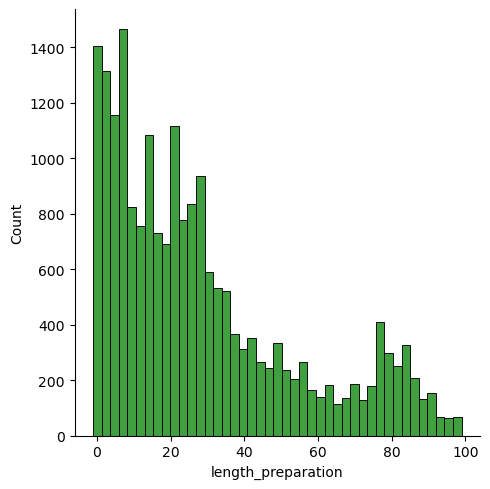

In [17]:
# Distribution of length_preparation of searches

# Percentage of dataset beyond 100 days
distribution = searches['length_preparation'] / np.timedelta64(1, 'D') # converts to numerical format
print('Percentage of dataset beyond 100 days:', len(distribution[distribution > 100]) / len(distribution) * 100, '% \n')

# Remove values beyond 100 days
distribution = distribution[distribution < 100]

# Distribution plot of length_preparation column
sns.displot(x=distribution, color='green')
plt.show()

100 days was chosen as the limit since only 9.40% of the dataset exists beyond that.

Most people appear to make very brief preparation prior to check in as `length_preparation` seems to largely concentrate within the `0 - 20 days` range. This may also imply that people likes to make impromptu visits.

Percentage of dataset beyond 20 nights: 4.737387021854101 % 

Mean n_nights: 3.766924084360746


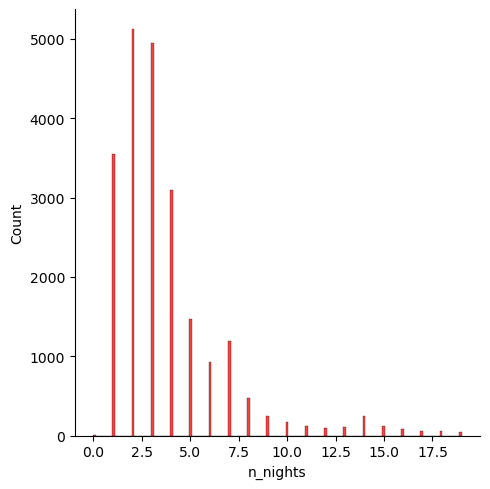

In [18]:
# Distribution of n_nights of searches

# Percentage of dataset beyond 20 nights
print('Percentage of dataset beyond 20 nights:', len(searches[searches['n_nights'] > 20]) / len(searches['n_nights'])*100, '% \n')

# Remove n_nights beyond 20 days
searches_within_twenty = searches[searches['n_nights'] < 20]
print('Mean n_nights:', (searches.loc[searches['n_nights'] < 20, 'n_nights']).mean())

# Distribution plot of n_nights column
sns.displot(searches_within_twenty, x='n_nights', color='red')
plt.show()

Removing `n_nights` beyond 20 days since only 4.73% of the dataset exists beyond 20 days.

Based on the distribution, most people tend to spend `3 - 4 nights` on their visits.

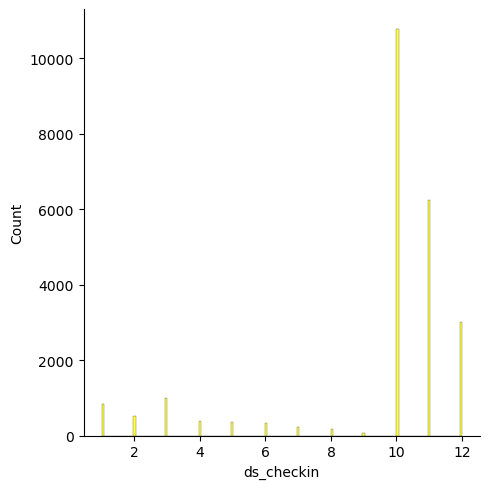

In [19]:
# Distribution of months of ds_checkin of searches

#checkin_month = pd.DatetimeIndex(searches['ds_checkin']).month
checkin_month = searches['ds_checkin'].dt.month

# Distribution plot of ds_checkin of column
sns.displot(checkin_month, color='yellow')
plt.show()

Used only the check-in month, as check-out is usually within 3/4 days. The mean `n_nights` after removing the upper outlier limit is 3.7, so assumed 3 or 4 days after check-in date people usually check-out.

In [20]:
# Types of rooms searched for

searches['filter_room_types'].value_counts().sort_values(ascending=False).head(10)

,Entire home/apt                                              6331
Entire home/apt                                               3667
,Private room                                                 1693
Private room                                                  1147
,Entire home/apt,Entire home/apt,Private room                  415
Entire home/apt,Private room                                   379
,Entire home/apt,Entire home/apt,Private room,Private room     370
,Entire home/apt,Private room                                  365
,Entire home/apt,Private room,Private room                     230
,Private room,Entire home/apt                                  137
Name: filter_room_types, dtype: int64

Most of the room types requested were entire home/apt and private rooms sometimes shared rooms. This column should be cleaned since most filter values are repeated within the same cell. On the Airbnb website, there are only 4 values in the type of place:

- Entire Place
- Private Room
- Hotel Room
- Shared Room

In [21]:
# Clean and transform the filter_room_types column to remove repeated values within the same cell and standardize the strings
valid_room_types = {'Entire home/apt':'Entire Place', 'Private room':'Private Room', 
                    'Hotel room':'Hotel Room', 'Shared room':'Shared Room'}

def clean_room_types(room_types):
    if pd.isna(room_types):
        return ''
    # Split by comma and strip whitespace and leading comma
    types = [rt.strip().lstrip(',') for rt in room_types.split(',')]
    # Keep only unique, valid types and map to standardized names via set comprehension
    cleaned_types = {valid_room_types.get(rt) for rt in types if rt in valid_room_types}
    # Return a standardized string with unique types
    return ', '.join(cleaned_types)

# Apply the function to the filter_room_types column, also replacing any blanks with np.nan, 
# followed by replacing the np.nan with its original values if it's not part of the valid_room_types dictionary
searches['filter_room_types_cleaned'] = (searches['filter_room_types']
                                         .apply(clean_room_types)
                                         .replace('', np.nan)
                                         .fillna(searches['filter_room_types'])
                                        )

In [22]:
searches['filter_room_types_cleaned'].value_counts().sort_values(ascending=False)

Entire Place                               9998
Private Room                               2840
Entire Place, Private Room                 2404
Entire Place, Private Room, Shared Room     460
Private Room, Shared Room                   260
Shared Room                                 128
Entire Place, Shared Room                   101
Name: filter_room_types_cleaned, dtype: int64

The above output still gives similar result as the previous where most search filter is set to `Entire Place`, followed by `Private Room`.

In [23]:
# Find top 15 countries where searches originate from

# Group by origin country and finding the count of each country
search_origin = searches.groupby("origin_country").agg({'origin_country':'count'})
search_origin.columns = ['count']

search_origin = search_origin.sort_values('count', ascending=False)
search_origin.nlargest(15, 'count')

,count
origin_country,
IE,6608
US,5811
GB,4832
FR,3444
IT,2333
DE,2170
ES,1759
CA,1085
AU,962


Most of the searches originate from `Ireland`, followed by `United States` and `Great Britain`. This makes sense as people who lives local to the area tend to have more knowledge and awareness to inquire on a trip to the area.

### _contacts_ Dataset Analysis

In [24]:
# Manipulation of contacts dataset

# Convert date columns to datetime data type
contacts['ts_contact_at'] = pd.to_datetime(contacts['ts_contact_at'])
contacts['ts_reply_at'] = pd.to_datetime(contacts['ts_reply_at'])
contacts['ts_accepted_at'] = pd.to_datetime(contacts['ts_accepted_at'])
contacts['ts_booking_at'] = pd.to_datetime(contacts['ts_booking_at'])
contacts['ds_checkin'] = pd.to_datetime(contacts['ds_checkin'])
contacts['ds_checkout'] = pd.to_datetime(contacts['ds_checkout'])
contacts['accepted'] = np.where(np.isnan(contacts['ts_accepted_at']), False, True) # If ts_accepted_at is nan, host did not accept

contacts['length_stay'] = contacts['ds_checkout'] - contacts['ds_checkin']

# Review dataset
display(contacts.dtypes)
display(contacts.describe())
print('Shape of dataset:', contacts.shape)

id_guest                   object
id_host                    object
id_listing                 object
ts_contact_at      datetime64[ns]
ts_reply_at        datetime64[ns]
ts_accepted_at     datetime64[ns]
ts_booking_at      datetime64[ns]
ds_checkin         datetime64[ns]
ds_checkout        datetime64[ns]
n_guests                    int64
n_messages                  int64
accepted                     bool
length_stay       timedelta64[ns]
dtype: object

,n_guests,n_messages,length_stay
count,7823.000000,7823.000000,7823
mean,2.422600,6.319954,5 days 19:25:32.864629937
std,1.617347,6.472827,14 days 23:45:24.447710564
min,1.000000,1.000000,1 days 00:00:00
25%,1.000000,2.000000,2 days 00:00:00
50%,2.000000,4.000000,3 days 00:00:00
75%,3.000000,8.000000,5 days 00:00:00
max,16.000000,102.000000,334 days 00:00:00


Shape of dataset: (7823, 13)


In [25]:
# Calculate skewness in contacts dataset

display(contacts.skew(axis=0, numeric_only=True, skipna=True))

n_guests      2.441468
n_messages    3.696440
accepted      0.145883
dtype: float64

All columns have coefficient value greater than 1 except for `accepted` which could be due to it being derived from existing columns.

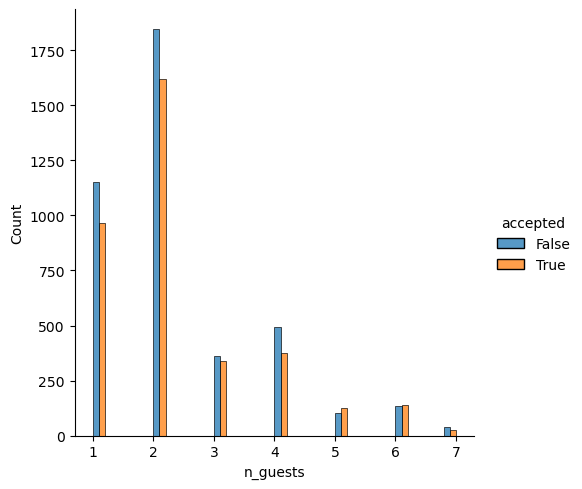

In [26]:
# Number of guests stayed

contacts_less8 = contacts[contacts['n_guests'] < 8]
sns.displot(contacts_less8, x='n_guests', hue='accepted', multiple='dodge')

Choosing less than 8 guests, since only 0.75% of the contacts dataset has 8 or more guests. To better visualize the majority distribution we removed rows with 8 or more guests.

2 guests is the most popular option to book, but 1 guest is the most popularly searched option. This leads me to believe there is a lack of supply of viable single guest rooms.

In [27]:
# Conversion rate from accepting to booking

contacts['ts_booking_at'].count()/contacts['ts_accepted_at'].count()

0.5993934381031155

The conversion rate is about `60%` which suggests that it is not definite for a booking to happen even when the host accepts an inquiry.

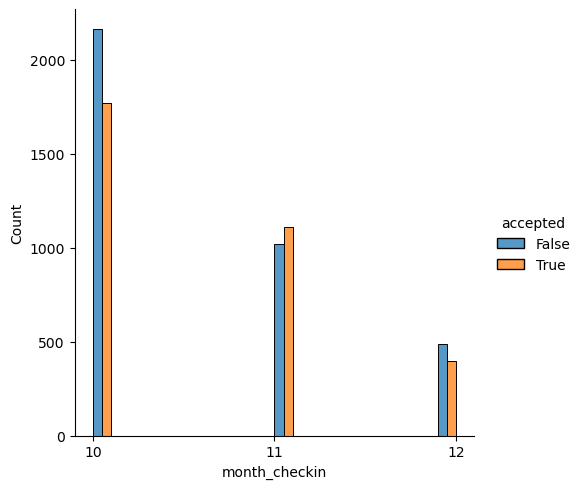

In [28]:
# Timeframe of when guests checkin segmented by accepted vs rejected
contacts['month_checkin'] = contacts['ds_checkin'].dt.month
contacts_checkin = contacts[contacts['month_checkin'] > 9] # Use only peak season months (Oct, Nov, Dec)

# Distribution of checkin among October, November, and December and split by acceptance
sns.displot(contacts_checkin, x='month_checkin', hue='accepted', multiple='dodge')
plt.xticks([10, 11, 12])
plt.show()

`October` seems to have the most number of inquiry with **accepted being more than rejected**. The highest number of inquiry made among the other months is possibly due to it being the holiday month of the year.

### Merged Datasets Analysis

In [29]:
# Merge datasets for further analysis

merged_datasets = contacts.merge(searches, left_on='id_guest', right_on='id_user')
print('Shape of dataset:', merged_datasets.shape)
merged_datasets.head()

Shape of dataset: (28536, 28)


,id_guest,id_host,id_listing,ts_contact_at,ts_reply_at,ts_accepted_at,ts_booking_at,ds_checkin_x,ds_checkout_x,n_guests,...,n_searches,n_nights,n_guests_min,n_guests_max,origin_country,filter_price_min,filter_price_max,filter_room_types,length_preparation,filter_room_types_cleaned
0,000dfad9-459b-4f0b-8310-3d6ab34e4f57,13bb24b8-d432-43a2-9755-5ea11b43bb69,21d2b1a2-fdc3-4b4c-a1f0-0eaf0cc02370,2014-10-04 16:26:28,2014-10-04 16:26:28,2014-10-04 16:26:28,2014-10-04 16:26:28,2014-10-13,2014-10-15,2,...,6,2.0,2,2,CA,0.0,130.0,",Entire home/apt",9 days,Entire Place
1,00197051-c6cb-4c3a-99e9-86615b819874,46aa3897-9c00-4d76-ac66-a307593d0675,fb5ed09a-9848-4f2c-b2ef-34deb62164fb,2014-11-04 09:10:03,2014-11-04 09:45:50,2014-11-04 09:45:50,2014-11-04 12:20:46,2014-11-27,2014-11-30,1,...,13,3.0,1,1,DK,0.0,336.0,",Entire home/apt,Private room,Private room",44 days,"Entire Place, Private Room"
2,0027538e-aa9e-4a02-8979-b8397e5d4cba,6bbb88ca-db66-48c5-9c4b-862f7706284a,d3871da6-8012-4dc4-b508-c91f2c10c297,2014-10-10 12:02:50,2014-10-10 15:07:01,NaT,NaT,2014-10-17,2014-10-19,2,...,21,2.0,2,2,CY,0.0,1258.0,",Entire home/apt,Entire home/apt,Private room,...",8 days,"Entire Place, Private Room"
3,0027538e-aa9e-4a02-8979-b8397e5d4cba,6bbb88ca-db66-48c5-9c4b-862f7706284a,d3871da6-8012-4dc4-b508-c91f2c10c297,2014-10-10 12:02:50,2014-10-10 15:07:01,NaT,NaT,2014-10-17,2014-10-19,2,...,44,2.0,2,2,CY,0.0,214.0,",Entire home/apt",7 days,Entire Place
4,0027538e-aa9e-4a02-8979-b8397e5d4cba,8772bc85-a9b7-4d85-a52d-41f3620c2912,0d9b5583-8053-4b67-adfe-8c29eb12efed,2014-10-10 15:23:53,NaT,NaT,NaT,2014-10-17,2014-10-19,2,...,21,2.0,2,2,CY,0.0,1258.0,",Entire home/apt,Entire home/apt,Private room,...",8 days,"Entire Place, Private Room"


,accepted
filter_room_types_cleaned,
Entire Place,0.424903
"Entire Place, Private Room",0.437257
"Entire Place, Private Room, Shared Room",0.329705
"Entire Place, Shared Room",0.362319
Private Room,0.434582
"Private Room, Shared Room",0.430000
Shared Room,0.368421


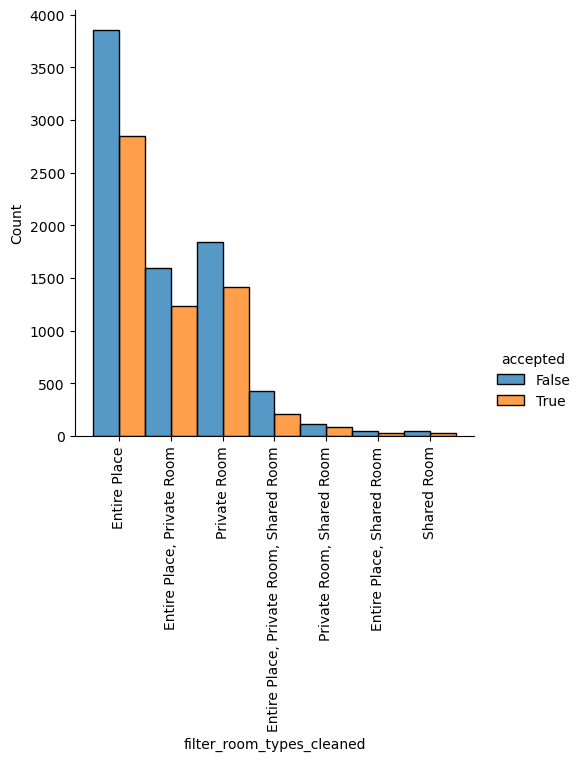

In [50]:
# Check the acceptance rate based filter_room_types
display(merged_datasets.groupby('filter_room_types_cleaned').agg({'accepted':'mean'}))

sns.displot(merged_datasets, x='filter_room_types_cleaned', hue='accepted', multiple='dodge')
plt.xticks(rotation=90)
plt.show()

It seems that the acceptance rate remains below 50% irrespective of room types, with **private room having the highest acceptance rate of 43.5%**.

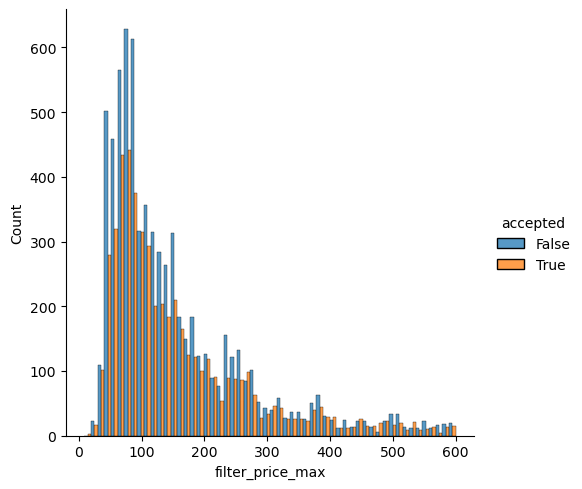

In [30]:
# Check difference between prices searched segmented by accepted/rejected applicants

merged_pricemax_filter = merged_datasets.loc[(merged_datasets['filter_price_max'] <= 600)]

sns.displot(merged_pricemax_filter, x='filter_price_max', hue='accepted', multiple='dodge')
plt.show()

To further help better visualize the trend we set the filter price max as less or equal to 600. 600 was chosen as the limit since only 6.33% of the dataset has values greater than 600.

As seen, more people are rejected than accepted with an average acceptance rate of 43%.

In [31]:
# Classify dataset based on filter_price_max

def label_price(row):
    if (row['filter_price_max'] >= 0) & (row['filter_price_max'] < 100):
        return '0-100'
    
    elif (row['filter_price_max'] >= 100) & (row['filter_price_max'] < 200):
        return '100-200'
    
    elif (row['filter_price_max'] >= 200) & (row['filter_price_max'] < 300):
        return '200-300'
    
    elif (row['filter_price_max'] >= 300) & (row['filter_price_max'] < 400):
        return '300-400'
    
    elif (row['filter_price_max'] >= 400) & (row['filter_price_max'] < 500):
        return '400-500'
    
    elif (row['filter_price_max'] >= 500) & (row['filter_price_max'] < 600):
        return '500-600'
    
    else:
        return '600+'

merged_datasets['classification_max_price'] = merged_datasets.apply(lambda row: label_price(row), axis=1)

merged_datasets.groupby('classification_max_price').agg({'accepted':'mean'})

,accepted
classification_max_price,
0-100,0.411160
100-200,0.430308
200-300,0.431149
300-400,0.450488
400-500,0.485549
500-600,0.422297
600+,0.433122


Based on the table, it can be seen that regardless of `filter_price_max`, people are rejected at similar rates.

In [40]:
room_types_price = merged_datasets.groupby(['filter_room_types_cleaned', 'classification_max_price']).agg({'accepted':'mean'}).unstack(level=1)

def highlight_max(s):
    is_max = s == s.max()
    return ['background-color:green; color:white' if v else '' for v in is_max]

room_types_price.style.apply(highlight_max, axis=1)

The table above shows that for `Private Room`, it is more likely that an inquiry will be accepted when price is set in the `400-600` range with an acceptance rate of `62.5%`.

In [33]:
# Find the acceptance rate by country

dataset_country = merged_datasets[['origin_country', 'accepted']]

# Find acceptance count by country and accepted
accepted_count = dataset_country.groupby(['origin_country', 'accepted']).agg({'origin_country':'count'})
accepted_count.columns = ['count_accepted']

# Find acceptance count by country
country_count = dataset_country.groupby('origin_country').agg({'origin_country':'count'})
country_count.columns = ['count_country']

# Merge datasets for easier manipulation
acceptance_country = pd.merge(dataset_country, accepted_count, how='left', on=['origin_country', 'accepted'])
acceptance_country = acceptance_country.drop_duplicates()

acceptance_country = pd.merge(acceptance_country, country_count, how='left', on=['origin_country'])
acceptance_country = acceptance_country.sort_values(['count_country', 'accepted'], ascending=[False, True])
acceptance_country = acceptance_country[acceptance_country['count_country'] >= 100] # 100 is used so there is good amount of data to make assumptions
acceptance_country = acceptance_country[acceptance_country['accepted'] == True]

# Divide count_accepted column by count_country to find acceptance rate by country
acceptance_country['acceptance_rate'] = acceptance_country['count_accepted'] / acceptance_country['count_country']
acceptance_country.sort_values(['acceptance_rate'], ascending=True)

,origin_country,accepted,count_accepted,count_country,acceptance_rate
73,IN,True,138,874,0.157895
55,HR,True,159,530,0.300000
72,AT,True,83,239,0.347280
54,RU,True,83,239,0.347280
11,IT,True,1183,3137,0.377112
100,AE,True,59,154,0.383117
0,CA,True,407,993,0.409869
13,IE,True,1217,2951,0.412403
24,ES,True,794,1914,0.414838
49,RO,True,50,118,0.423729


An interesting point is that India has the lowest acceptance rate of 15% which is half of the acceptance rate of the second lowest acceptance rate country. 

Let's visualize these data to gain more clarity and insights into Dublin Airbnb market by importing these datasets into Tableau.

In [51]:
# Load the datasets to Tableau for visualizations by converting to csv format
#searches.to_csv('searches_df.csv')
#contacts.to_csv('contacts_df.csv')
#merged_datasets.to_csv('merged_df.csv')

To further analyze the datasets for insights, trends, and correlations, the dataset `searches`, `contacts`, and `merged_datasets` will be **imported into SQL Server** to query for meaningful and actionable insights.

In [92]:
def data_to_sql(df, database_name, table_name, server):
    engine = sal.create_engine(f'mssql://{server}/master?driver=ODBC+DRIVER+17+FOR+SQL+SERVER', isolation_level="AUTOCOMMIT")
    conn = engine.connect()
    
    create_db_query = f"CREATE DATABASE {database_name}"
    conn.execute(create_db_query)
    
    verify_query = f"SELECT name FROM sys.databases WHERE name = '{database_name}'"
    result = conn.execute(verify_query)
    for row in result:
        print(f"Database created: {row[0]}")
        
    engine_new_db = sal.create_engine(f'mssql://{server}/{database_name}?driver=ODBC+DRIVER+17+FOR+SQL+SERVER', isolation_level="AUTOCOMMIT")
    conn_new_db = engine_new_db.connect()
    
    df.to_sql(table_name, con=conn_new_db, if_exists='replace', index=False)
    
    print("Table created and data loaded successfully.")

data_to_sql(df=searches, database_name='AirbnbMarket', table_name='searches_df', server='Najmi-XPS\SQLEXPRESS')

Database created: AirbnbMarket


C:\Users\najmi\AppData\Local\Temp\ipykernel_34920\4188778535.py:16: UserWarning: the 'timedelta' type is not supported, and will be written as integer values (ns frequency) to the database.
  df.to_sql(table_name, con=conn_new_db, if_exists='replace', index=False)


Table created and data loaded successfully.


In [99]:
def df_to_sql(df, database_name, table_name, server, action):
    engine = sal.create_engine(f'mssql://{server}/{database_name}?driver=ODBC+DRIVER+17+FOR+SQL+SERVER', isolation_level="AUTOCOMMIT")
    
    conn = engine.connect()
    df.to_sql(table_name, con=conn, if_exists=action, index=False)
    
    print(f"Table created and {table_name} loaded successfully.")

df_to_sql(df=contacts, database_name='AirbnbMarket', table_name='contacts_df', server='Najmi-XPS\SQLEXPRESS', action='replace')

C:\Users\najmi\AppData\Local\Temp\ipykernel_34920\3737874543.py:5: UserWarning: the 'timedelta' type is not supported, and will be written as integer values (ns frequency) to the database.
  df.to_sql(table_name, con=conn, if_exists=action, index=False)


Table created and contacts_df loaded successfully.


In [100]:
def df_to_sql(df, database_name, table_name, server, action):
    engine = sal.create_engine(f'mssql://{server}/{database_name}?driver=ODBC+DRIVER+17+FOR+SQL+SERVER', isolation_level="AUTOCOMMIT")
    
    conn = engine.connect()
    df.to_sql(table_name, con=conn, if_exists=action, index=False)
    
    print(f"Table created and {table_name} loaded successfully.")

df_to_sql(df=merged_datasets, database_name='AirbnbMarket', table_name='merged_df', server='Najmi-XPS\SQLEXPRESS', action='replace')

C:\Users\najmi\AppData\Local\Temp\ipykernel_34920\3486187542.py:5: UserWarning: the 'timedelta' type is not supported, and will be written as integer values (ns frequency) to the database.
  df.to_sql(table_name, con=conn, if_exists=action, index=False)


Table created and merged_df loaded successfully.


In [105]:
searches['ds_checkin'].max()

Timestamp('2016-06-02 00:00:00')

In [106]:
contacts['ds_checkout'].max()

Timestamp('2015-12-01 00:00:00')